In [ ]:
# Connection Installation for Kaggle Account.
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
# Kaggle token copy in .json file
!cp kaggle.json ~/.kaggle

In [ ]:
# Importing dataset from the Kaggle.
!kaggle datasets download -d mohamedafsal007/house-price-dataset-of-india

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 93.9MB/s]


In [ ]:
# Unzip the dataset, convert into csv file.
!unzip /content/house-price-dataset-of-india.zip

Archive:  /content/house-price-dataset-of-india.zip
  inflating: House Price India.csv   


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading CSV data to pandas data frames
df = pd.read_csv('/content/House Price India.csv')
type(df)

pandas.core.frame.DataFrame

##1. Data Preprocessing & Visualization.


In [ ]:
df.head(7)

id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   
5  6762813105  42491                   3                 2.50         2600   
6  6762813157  42491                   5                 3.25         3660   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   
5      4750               1.0                   0                0   
6     11995               2.0                   0                2   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...        1921                0       122003   
1                       5  ...        1909                0       122004   
2                       3  ...        1939                0       122004   
3                       3  ...        2001                0       122005   
4                       4  ...        1929                0       122006   
5                       4  ...        1951                0       122007   
6                       3  ...        2006                0       122008   

   Lattitude  Longitude  living_area_renov  lot_area_renov  \
0    52.8645   -114.557               2880            5400   
1    52.8878   -114.470               2470            4000   
2    52.8852   -114.468               2940            6600   
3    52.9532   -114.321               3350           42847   
4    52.9047   -114.485               2060            4500   
5    52.9133   -114.590               2380            4750   
6    52.7637   -114.050               3320           11241   

   Number of schools nearby  Distance from the airport    Price  
0                         2                         58  2380000  
1                         2                         51  1400000  
2                         1                         53  1200000  
3                         3                         76   838000  
4                         1                         51   805000  
5                         1                         67   790000  
6                         3                         72   785000  

[7 rows x 23 columns]

In [ ]:
df.tail(7)

id   Date  number of bedrooms  number of bathrooms  \
14613  6762829600  42734                   3                 1.00   
14614  6762829669  42734                   3                 1.75   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
14613         1400     10425               1.0                   0   
14614         1590      7931               1.0                   0   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
14613                0                       4  ...        1968   
14614                0                       3  ...        1979   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
14613                0       122040    52.5038   -114.491               1440   
14614                0       122024    52.5928   -114.240               1680   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
14613           10425                         2                         59   
14614            7931                         1                         80   
14615           17286                         3                         76   
14616            7480                         3                         59   
14617            6120                         2                         64   
14618            6631                         3                         54   
14619            3480                         2                         55   

        Price  
14613  241500  
14614  240000  
14615  221700  
14616  219200  
14617  209000  
14618  205000  
14619  146000  

[7 rows x 23 columns]

In [ ]:
df.shape

(14620, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [ ]:
df.min()

id                                       6.762810e+09
Date                                     4.249100e+04
number of bedrooms                       1.000000e+00
number of bathrooms                      5.000000e-01
living area                              3.700000e+02
lot area                                 5.200000e+02
number of floors                         1.000000e+00
waterfront present                       0.000000e+00
number of views                          0.000000e+00
condition of the house                   1.000000e+00
grade of the house                       4.000000e+00
Area of the house(excluding basement)    3.700000e+02
Area of the basement                     0.000000e+00
Built Year                               1.900000e+03
Renovation Year                          0.000000e+00
Postal Code                              1.220030e+05
Lattitude                                5.238590e+01
Longitude                               -1.147090e+02
living_area_renov           

In [ ]:
df.max()

id                                       6.762832e+09
Date                                     4.273400e+04
number of bedrooms                       3.300000e+01
number of bathrooms                      8.000000e+00
living area                              1.354000e+04
lot area                                 1.074218e+06
number of floors                         3.500000e+00
waterfront present                       1.000000e+00
number of views                          4.000000e+00
condition of the house                   5.000000e+00
grade of the house                       1.300000e+01
Area of the house(excluding basement)    9.410000e+03
Area of the basement                     4.820000e+03
Built Year                               2.015000e+03
Renovation Year                          2.015000e+03
Postal Code                              1.220720e+05
Lattitude                                5.300760e+01
Longitude                               -1.135050e+02
living_area_renov           

In [ ]:
df.isnull()

id   Date  number of bedrooms  number of bathrooms  living area  \
0      False  False               False                False        False   
1      False  False               False                False        False   
2      False  False               False                False        False   
3      False  False               False                False        False   
4      False  False               False                False        False   
...      ...    ...                 ...                  ...          ...   
14615  False  False               False                False        False   
14616  False  False               False                False        False   
14617  False  False               False                False        False   
14618  False  False               False                False        False   
14619  False  False               False                False        False   

       lot area  number of floors  waterfront present  number of views  \
0         False             False               False            False   
1         False             False               False            False   
2         False             False               False            False   
3         False             False               False            False   
4         False             False               False            False   
...         ...               ...                 ...              ...   
14615     False             False               False            False   
14616     False             False               False            False   
14617     False             False               False            False   
14618     False             False               False            False   
14619     False             False               False            False   

       condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       False  ...       False            False        False   
1                       False  ...       False            False        False   
2                       False  ...       False            False        False   
3                       False  ...       False            False        False   
4                       False  ...       False            False        False   
...                       ...  ...         ...              ...          ...   
14615                   False  ...       False            False        False   
14616                   False  ...       False            False        False   
14617                   False  ...       False            False        False   
14618                   False  ...       False            False        False   
14619                   False  ...       False            False        False   

       Lattitude  Longitude  living_area_renov  lot_area_renov  \
0          False      False              False           False   
1          False      False              False           False   
2          False      False              False           False   
3          False      False              False           False   
4          False      False              False           False   
...          ...        ...                ...             ...   
14615      False      False              False           False   
14616      False      False              False           False   
14617      False      False              False           False   
14618      False      False              False           False   
14619      False      False              False           False   

       Number of schools nearby  Distance from the airport  Price  
0                         False                      False  False  
1                         False                      False  False  
2                         False                      False  False  
3                         False                      False  False  
4                         False                      False  False  
...                         ...   

In [ ]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
df.describe().T

count          mean            std  \
id                                     14620.0  6.762821e+09    6237.574799   
Date                                   14620.0  4.260454e+04      67.347991   
number of bedrooms                     14620.0  3.379343e+00       0.938719   
number of bathrooms                    14620.0  2.129583e+00       0.769934   
living area                            14620.0  2.098263e+03     928.275721   
lot area                               14620.0  1.509328e+04   37919.621304   
number of floors                       14620.0  1.502360e+00       0.540239   
waterfront present                     14620.0  7.660739e-03       0.087193   
number of views                        14620.0  2.331053e-01       0.766259   
condition of the house                 14620.0  3.430506e+00       0.664151   
grade of the house                     14620.0  7.682421e+00       1.175033   
Area of the house(excluding basement)  14620.0  1.801784e+03     833.809963   
Area of the basement                   14620.0  2.964791e+02     448.551409   
Built Year                             14620.0  1.970926e+03      29.493625   
Renovation Year                        14620.0  9.092401e+01     416.216661   
Postal Code                            14620.0  1.220331e+05      19.082418   
Lattitude                              14620.0  5.279285e+01       0.137522   
Longitude                              14620.0 -1.144040e+02       0.141326   
living_area_renov                      14620.0  1.996702e+03     691.093366   
lot_area_renov                         14620.0  1.275350e+04   26058.414467   
Number of schools nearby               14620.0  2.012244e+00       0.817284   
Distance from the airport              14620.0  6.495096e+01       8.936008   
Price                                  14620.0  5.389322e+05  367532.380804   

                                                min           25%  \
id                                     6.762810e+09  6.762815e+09   
Date                                   4.249100e+04  4.254600e+04   
number of bedrooms                     1.000000e+00  3.000000e+00   
number of bathrooms                    5.000000e-01  1.750000e+00   
living area                            3.700000e+02  1.440000e+03   
lot area                               5.200000e+02  5.010750e+03   
number of floors                       1.000000e+00  1.000000e+00   
waterfront present                     0.000000e+00  0.000000e+00   
number of views                        0.000000e+00  0.000000e+00   
condition of the house                 1.000000e+00  3.000000e+00   
grade of the house                     4.000000e+00  7.000000e+00   
Area of the house(excluding basement)  3.700000e+02  1.200000e+03   
Area of the basement                   0.000000e+00  0.000000e+00   
Built Year                             1.900000e+03  1.951000e+03   
Renovation Year                        0.000000e+00  0.000000e+00   
Postal Code                            1.220030e+05  1.220170e+05   
Lattitude                              5.238590e+01  5.270760e+01   
Longitude                             -1.147090e+02 -1.145190e+02   
living_area_renov                      4.600000e+02  1.490000e+03   
lot_area_renov                         6.510000e+02  5.097750e+03   
Number of schools nearby               1.000000e+00  1.000000e+00   
Distance from the airport              5.000000e+01  5.700000e+01   
Price                                  7.800000e+04  3.200000e+05   

                                                50%           75%  \
id                                     6.762821e+09  6.762826e+09   
Date                                   4.260000e+04  4.266200e+04   
number of bedrooms                     3.000000e+00  4.000000e+00   
number of bathrooms                    2.250000e+00  2.500000e+00   
living area                            1.930000e+03  2.570000e+03   
lot area                               7.620000e+03  1.080000e+04   
numb

In [ ]:
df = df.drop(columns=['id','Date'])
df

number of bedrooms  number of bathrooms  living area  lot area  \
0                       5                 2.50         3650      9050   
1                       4                 2.50         2920      4000   
2                       5                 2.75         2910      9480   
3                       4                 2.50         3310     42998   
4                       3                 2.00         2710      4500   
...                   ...                  ...          ...       ...   
14615                   2                 1.50         1556     20000   
14616                   3                 2.00         1680      7000   
14617                   2                 1.00         1070      6120   
14618                   4                 1.00         1030      6621   
14619                   3                 1.00          900      4770   

       number of floors  waterfront present  number of views  \
0                   2.0                   0                4   
1                   1.5                   0                0   
2                   1.5                   0                0   
3                   2.0                   0                0   
4                   1.5                   0                0   
...                 ...                 ...              ...   
14615               1.0                   0                0   
14616               1.5                   0                0   
14617               1.0                   0                0   
14618               1.0                   0                0   
14619               1.0                   0                0   

       condition of the house  grade of the house  \
0                           5                  10   
1                           5                   8   
2                           3                   8   
3                           3                   9   
4                           4                   8   
...                       ...                 ...   
14615                       4                   7   
14616                       4                   7   
14617                       3                   6   
14618                       4                   6   
14619                       3                   6   

       Area of the house(excluding basement)  ...  Built Year  \
0                                       3370  ...        1921   
1                                       1910  ...        1909   
2                                       2910  ...        1939   
3                                       3310  ...        2001   
4                                       1880  ...        1929   
...                                      ...  ...         ...   
14615                                   1556  ...        1957   
14616                                   1680  ...        1968   
14617                                   1070  ...        1962   
14618                                   1030  ...        1955   
14619                                    900  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552      

In [ ]:
def rename_columns(columns):
    return columns.lower().replace(' ','_')

In [ ]:
df.rename(columns=rename_columns, inplace=True)

In [ ]:
df.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

<Axes: >

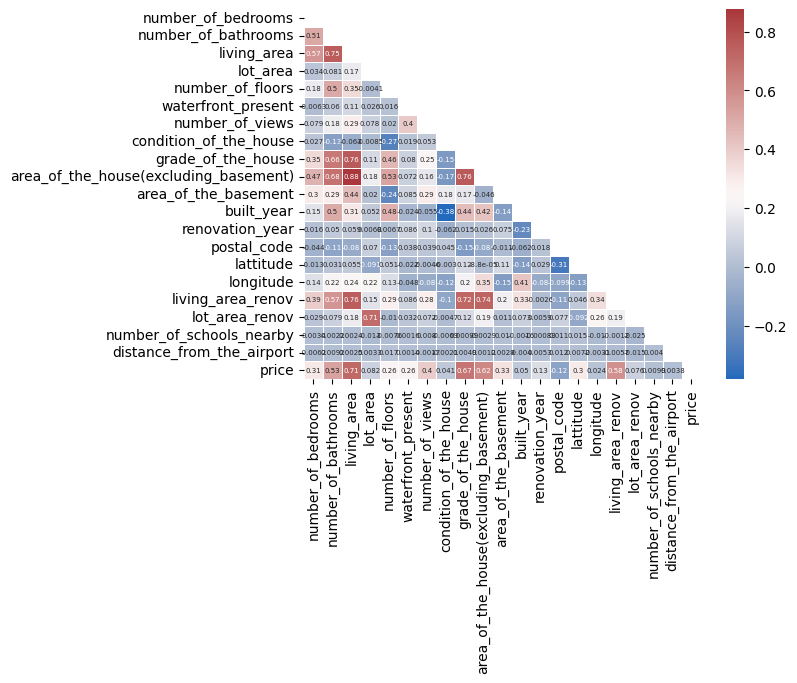

In [ ]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, cmap='vlag',
            linewidths=0.5, linecolor='white',annot=True, annot_kws={'size':5})

##Increasing the price of houses accourding to number of bedrooms.

<Axes: xlabel='number_of_bedrooms', ylabel='price'>

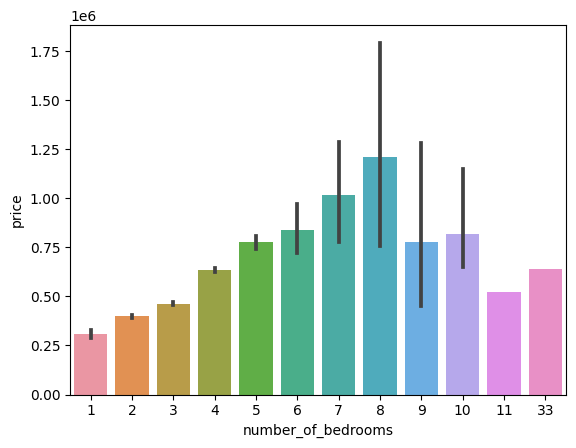

In [ ]:
sns.barplot(data=df,x='number_of_bedrooms',y='price')

Text(0.5, 1.0, 'Prices distribution')

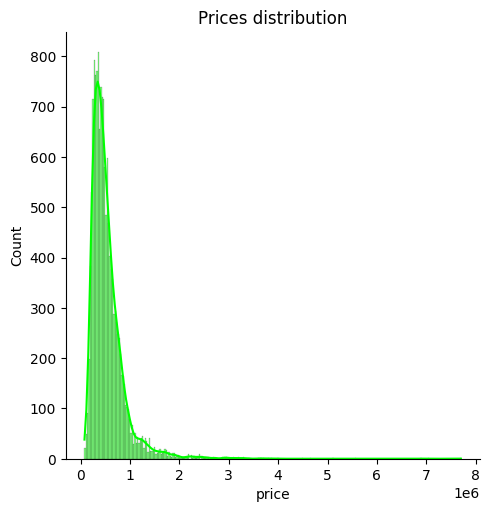

In [ ]:
sns.displot(df.price, kde = True, color='lime')
plt.title('Prices distribution')

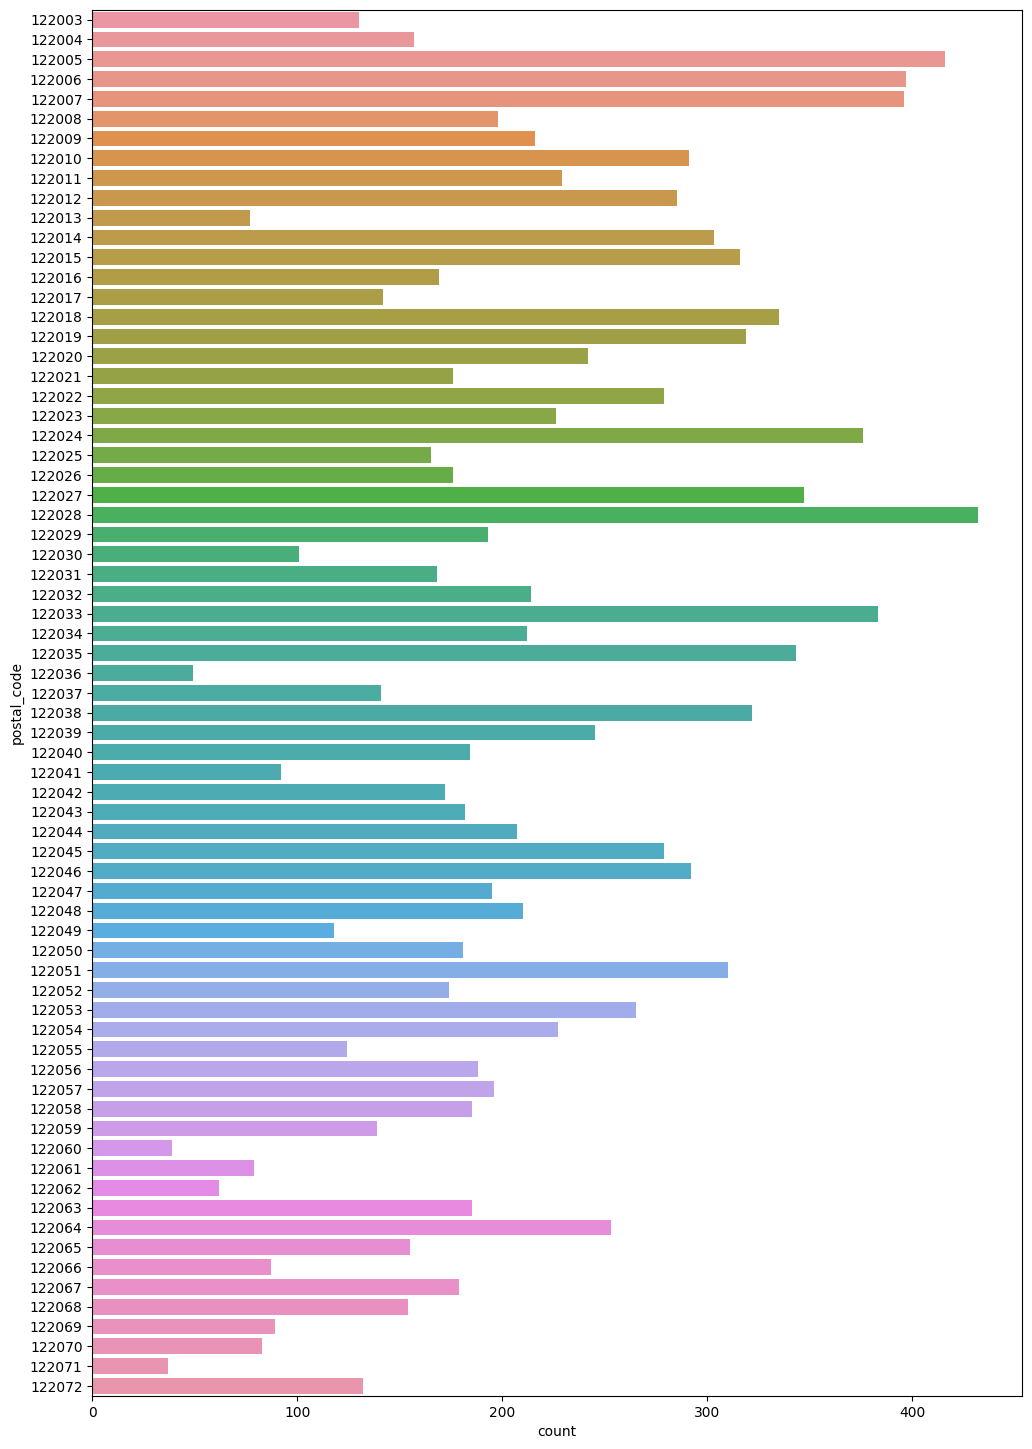

In [ ]:
plt.figure(figsize=(12,18))
sns.countplot(data=df,y='postal_code')
plt.show()

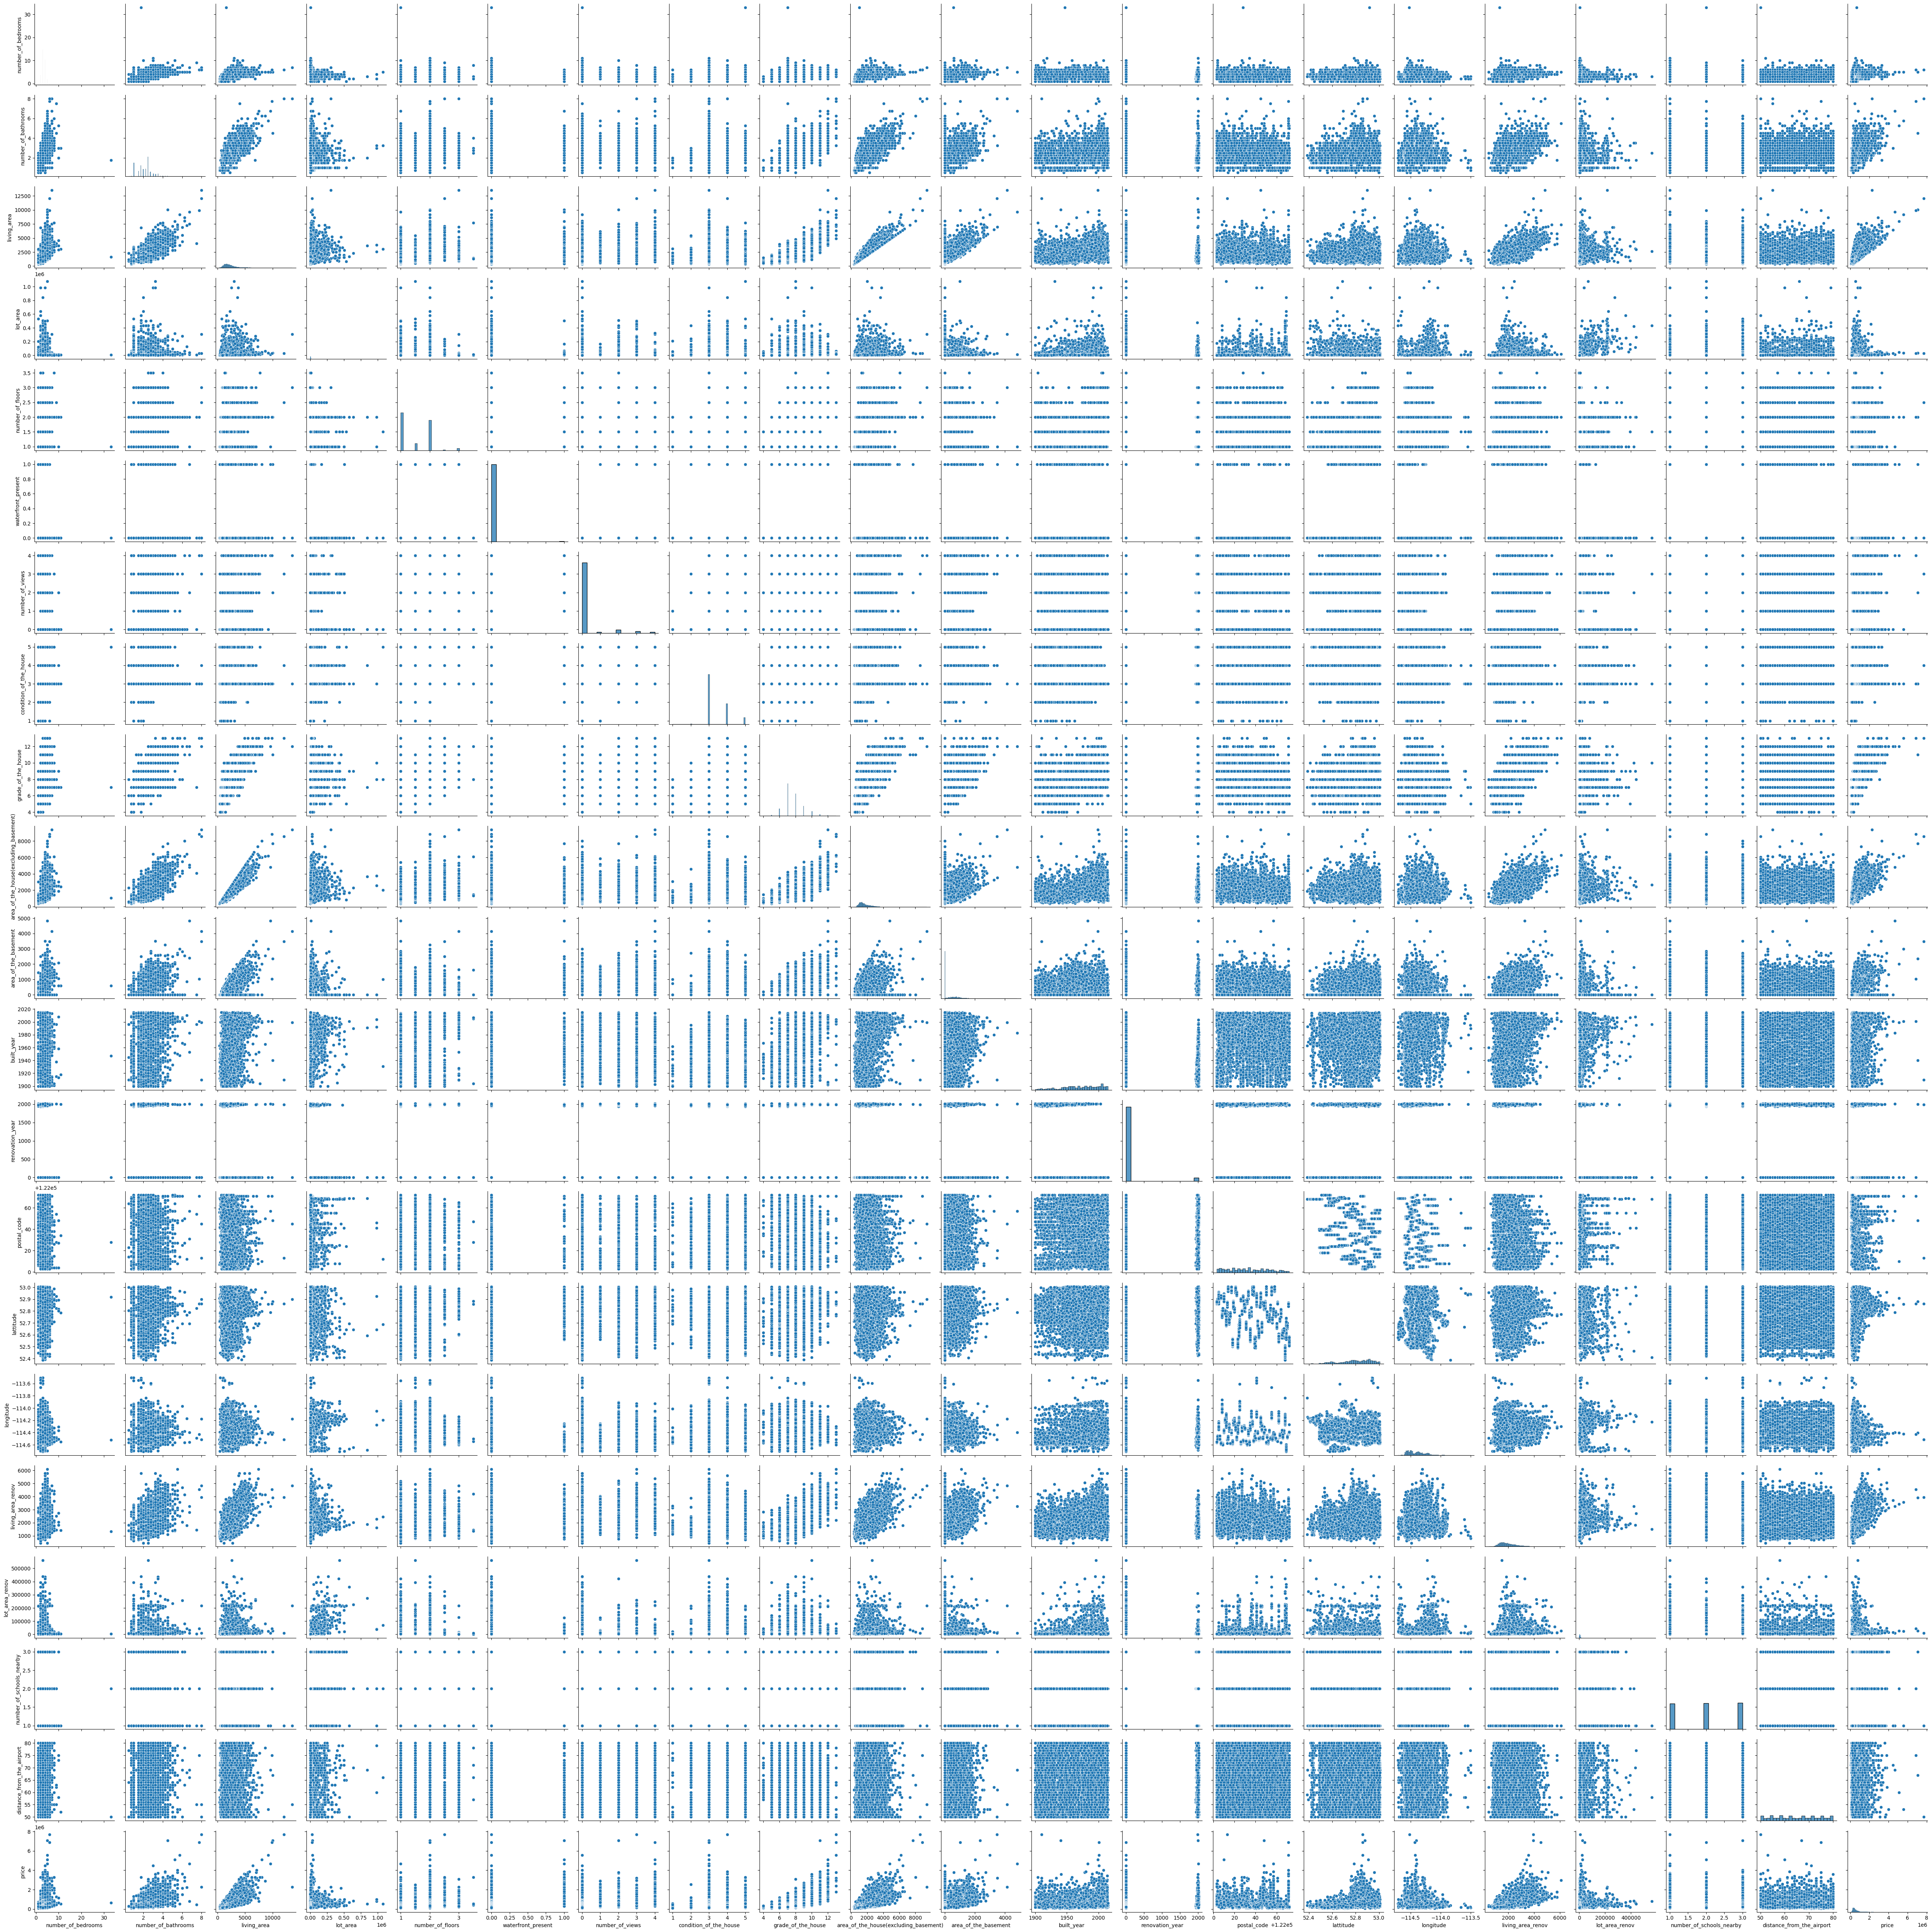

In [ ]:
sns.pairplot(df)

##Houses which is on sale, witg Pincode 122028

In [ ]:
df[df['built_year']==2014]['lattitude'].mean()

52.77956138613861

In [ ]:
df[df['built_year']==2014]['lattitude'].mean()

52.77956138613861

In [ ]:
df.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

In [ ]:
import folium
m = folium.Map(location = [52.77, -114.4], tiles ='OpenStreetMap',      
    zoom_start=8)

for index, location_info in df[(df['built_year']==2014) & (df['distance_from_the_airport']<=70)].iterrows():
    folium.Marker([location_info["lattitude"], location_info["longitude"]], popup=location_info["price"],icon=folium.Icon(color='red')).add_to(m)
m

##2. Build the ANN Model
a. Input layer b. Minimum of 2 Hidden layers c. Output layer

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 20)

 shape of X_test - (2924, 20)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



##Model Building.

In [ ]:
number_of_features = len(X.columns)
model = Sequential()
model.add(layer=Input(shape=number_of_features))
model.add(layer=Dense(units=32, activation='relu'))
model.add(layer=Dense(units=64, activation='relu'))
model.add(layer=Dense(units=128, activation='relu'))
model.add(layer=Dense(units=256, activation='relu'))
model.add(layer=Dense(units=512, activation='relu'))
model.add(layer=Dense(units=1024, activation='relu'))
model.add(layer=Dense(units=2048, activation='relu'))
model.add(layer=Dense(units=256, activation='relu'))
model.add(layer=Dense(units=128, activation='relu'))
model.add(layer=Dense(units=64, activation='relu'))
model.add(layer=Dense(units=32, activation='relu'))
model.add(layer=Dense(units=16, activation='relu'))
model.add(layer=Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dense_6 (Dense)             (None, 2048)             

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

##Training the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
366/366 [==============================] - 30s 73ms/step - loss: 122160128000.0000 - mae: 226819.7500 - mape: 49.9582
Epoch 2/100
366/366 [==============================] - 27s 74ms/step - loss: 71489601536.0000 - mae: 177644.2188 - mape: 37.4516
Epoch 3/100
366/366 [==============================] - 27s 74ms/step - loss: 67229020160.0000 - mae: 173620.2188 - mape: 36.1119
Epoch 4/100
366/366 [==============================] - 29s 78ms/step - loss: 64868032512.0000 - mae: 169980.0000 - mape: 35.2486
Epoch 5/100
366/366 [==============================] - 28s 76ms/step - loss: 56457011200.0000 - mae: 159975.0156 - mape: 33.6399
Epoch 6/100
366/366 [==============================] - 28s 77ms/step - loss: 59443851264.0000 - mae: 162646.2969 - mape: 34.1214
Epoch 7/100
366/366 [==============================] - 28s 76ms/step - loss: 58516828160.0000 - mae: 163643.8594 - mape: 34.2891
Epoch 8/100
366/366 [==============================] - 27s 73ms/step - loss: 57346904064.0000 - 

##Prediction on hidden model.

In [ ]:
y_pred = model.predict(X_test)

92/92 [==============================] - 3s 26ms/step


In [ ]:
y_pred

array([[342266.97],
       [408430.53],
       [304827.25],
       ...,
       [419032.25],
       [306211.28],
       [454563.4 ]], dtype=float32)

In [ ]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: price, Length: 2924, dtype: int64

##Represented the Actual value Vs Predicted value - visually.

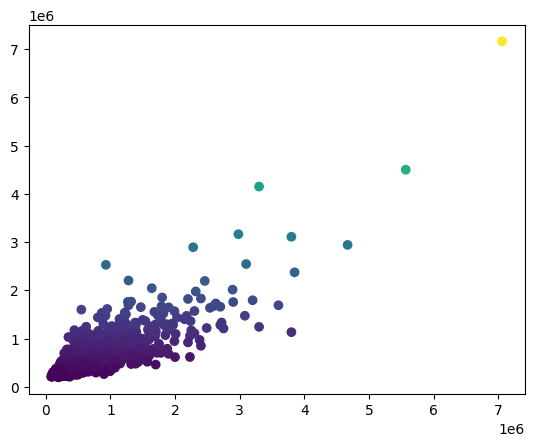

In [ ]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [ ]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

Actual Value  Predicted Value
0           640000     342266.96875
1           650000     408430.53125
2           325000     304827.25000
3           373000     430908.43750
4           355000     507198.84375
...            ...              ...
2919        497000     546901.25000
2920        400000     345668.03125
2921        366750     419032.25000
2922        276000     306211.28125
2923        569000     454563.40625

[2924 rows x 2 columns]

##3. Testing The Model.

##Output for the test data Accuracy using ANN

In [ ]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

65.90411779451858